# 실습 2-2

#### 실습 개요
- 실습 목적 : 테이블 데이터에서 결측값을 확인하고 대체 또는 제거하는 과정 이해
- 실습 데이터 : boston_missing.csv (506 observations)Comma separated value 형태의 데이터
    - 보스턴 주택 데이터로, 주택 가격에 영향을 미치는 변수들이 존재
- 실습 과정
    - Import data
    - Import 된 데이터를 테이블로 확인 및 이해
    - Summary Statistics 확인
    - 데이터 검토 및 결측값 대체
    - 결측값 데이터 제거
    
#### Workflow
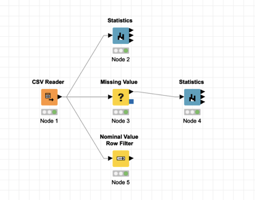

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Data
df = pd.read_csv("Week 2 Data/boston_missing.csv").iloc[:,1:]
#데이터 테이블로 확인 및 이해
df.head()

In [ ]:
#Summary Statistics
df.describe()

In [ ]:
#Looking for missing value
df.isnull().any()

In [ ]:
#See how many missing values for each column
df.isnull().sum()

In [ ]:
null_removed_df = df.dropna()
null_replaced_df = df.fillna(df['CHAS'].value_counts().idxmax()) #with most frequent value of CHAS col

In [ ]:
null_removed_df['CHAS']

In [ ]:
null_replaced_df

#### 분석 데이터 특징 사항

In [ ]:
plot_df = df.drop(df.columns[[0,9]],1)
for i,col in enumerate(plot_df.columns):
    plt.figure(i)
    sns.distplot(plot_df[col])

In [ ]:
df.dtypes

- 506개의 row가 있고, 20개의 column이 존재하며 그중 3가지의 nominal value column이 있다. CHAS Column에서 6개의 observation이 결측치를 포함하고 있다.
- Missing Value 처리는 두가지 방법을 시행 하였다.
    - 해당 결측치들을 most frequent value로 replace 하였다.
    - 해당 결측치들을 nominal value filter로 제거하였다.

#### 본 실습의 활용/응용 방안
- 데이터를 불러오는 과정에서 사용자의 분석 목적에 따라 Nominal 과 Continuous 값들을 잘 분류할 것.
- 결측치 처리를 할때 해당 변수와 dependent variable과의 관계를 잘 파악하고 replace할지 remove할지 결정할 것.

# 실습 2-3
- 실습 개요
    - 실습 목적
        - 테이블 데이터를 시각화하여 데이터 특성 이해
    - 실습 데이터
        - Boston.csv
        - 보스턴 주택 데이터로, 주택 가격에 영향을 미치는 변수들이 존재
    - 실습 과정
        - 데이터 불러오기
        - 불러온 데이터 테이블로 확인하기
        - 데이터 검토 및 이상치 확인
        - 변수 별 기초통계 및 변수간 상관관계
        - 히스토그램
        - 산포도
        - 산포도 매트릭스
        - 박스 플롯

In [ ]:
#Import Data
df2 = pd.read_csv("Week 2 Data/Boston.csv").iloc[:,1:]
#테이블로 확인
df2.head()

In [ ]:
#데이터 검토 및 이상치 확인
df2.isnull().any()

In [ ]:
#변수 별 기초통계
df2.describe()

In [ ]:
#변수 간 상관관계
df2.corr()

In [ ]:
#scatter matrix + histogram
sns.pairplot(df2)

#### Workflow
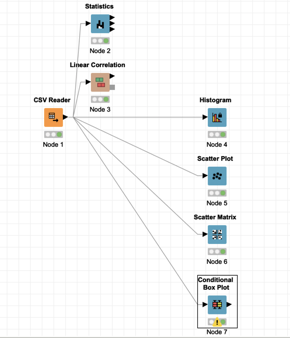

#### 데이터 전처리를 통해 파악한 분석 데이터의 특징
- Sample Statistics
    - CRIM  (min:0.0063, max:88.9762, mean: 3.6135), ZN (min:0.0, max:100, mean: 11.3636), B (min:0.32, max:396.9, mean:356.674) 칼럼들의 skewness가 높다. 특히 CRIM은positively skewed.
    - Unusualness를 판별하기 위해 categorical data의 frequency count를 보았더니, CHAS칼럼의 값들이 T와 F중 F에 더 많이 해당이 되는 것을 발견.
- Correlation Matrix

In [ ]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

- 변수간 상관관계가 높은 조합
    - LSTAT – MEDV (-0.7363)
    - DIS – INDUS (-0.708)
    - NOX – DIS (-0.7692)
    - AGE – DIS (-0.7479)
    - RAD – TAX (0.9102) 
    - CMEDV – MEDV (0.9969)
- 데이터 시각화 결과

In [ ]:
#Histogram(age)
sns.distplot(df2['AGE'],kde=False)

In [ ]:
#Scatter Plot(LSTAT-MEDV)
plt.figure(figsize=(16, 6))
g = sns.jointplot(x = 'LSTAT',y = 'MEDV', data = df2,kind = "kde",color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df2['LSTAT'], df2['MEDV'], cmap=cmap, n_levels=15, shade=True);

In [ ]:
#boxplot (CHAS-MEDV)
plt.figure(figsize=(10, 10))
sns.boxplot(df2['CHAS'],df2['MEDV'],palette = 'nipy_spectral',showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"})

- 데이터 전처리와 시각화를 통해 파악한 보스턴 주택 데이터의 특징 사항
    - 변수간 다중 공선성 존재(rule of thumb, r > 0.9)
        - MEDV-CMEDV (r=0.9969)
        - RAD-TAX (r=0.9102)
    - RAD-TAX의 경우, Correlation의 assumption중 하나인 Gaussian Distribution을 따르지 않기 때문에 관계성에 의미부여하는것이 힘들다.
    - Box-plot에 의하면, 찰스강에서 가깝지 않은 집들의 MEDV 수치가outlier가 많고, 그중 extreme한 outlier도 존재하였다.

In [ ]:
sns.pairplot(data=df2, vars=['RAD','TAX'])

- 본 실습 내용의 활용/응용 방안
    - 데이터를 수치적으로 파악하는 것 보다 시각화 하여 파악하는게 효율적 이라는 것을 배웠기 때문에 각각의 시각화 방법들을 적재적소에 잘 활용 할 것이다.
    - 모델 설계 단계 이전에 변수 간 correlation 을 해석할때 distribution이 가우시안 인지 확인하는 과정이 중요하다.
    - 모델 목적에 따라 다르겠지만, 일반적인 경우 box plot을 이용해 outlier들을 제거할 것이다.

# 실습 2-4
- 본 실습의 개요
    - 목적: 데이터 전처리 방식 이해 (분포확인, 공백제거, 변수제거, 새로운변수 생성, 히스토그램)
    - 실습 데이터
        - 통신.txt
        - 통신 서비스 가입자 100명의 id, 주민등록번호, 직종, 가입 통신사, 통화료 데이터
    - 실습 내용
        - 데이터 불러오기
        - 불러온 데이터 확인하기
        - 불러온 데이터 분포도 확인하기
        - 데이터 전처리: 공백 제거
        - 공백 제거한 데이터 분포 확인하기
        - 주민번호 데이터에서 나이를 추출해 새로운 변수 생성
        - 주민번호 데이터에서 성별을 추출해 새로운 변수 생성
        - 전체 데이터의 필드 순서 변경하기
        - 데이터의 통계적 특성 및 상관관계 파악하기

In [ ]:
#Import Data
df3 = pd.read_csv("Week 2 Data/통신.txt",sep = " ")
#데이터 확인
df3

In [ ]:
#데이터 분포도 확인
plt.figure(figsize=(15,10))
sns.distplot(df3['Cost'],kde=False)

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df3['Affiliates'])

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df3['Occupation'])

In [ ]:
# 3가지로 나눠야되는데 공백땜시 이상함. 공백제거를 하자.
# Series.str.strip()은 string 중간의 whitespace에 대해서는 핸들하지 않으니 replace를 쓰겠다.
df3['Affiliates']= df3['Affiliates'].str.replace(" ","")

In [ ]:
#데이터 분포도 재확인
plt.figure(figsize=(15,10))
sns.countplot(df3['Affiliates'])

In [ ]:
#주민번호를 이용해 성별 변수 추가
df3['Gender'] = df3['SSN'].str.get(7).apply(lambda x: 'Male' if x == '1' else 'Female')

In [ ]:
df3.head()

In [ ]:
#주민번호를 이용해 나이 변수 추가
df3['Age'] = df3['SSN'].apply(lambda x: 2020-int('19'+x[0:2]))

In [ ]:
df3.head()

In [ ]:
# Summary Statistics를 통해 Cost변수(min:16k, max:120k, mean: 41k)에 outlier가 있을 것으로 예상
df3.describe()

In [ ]:
# 이에 따른boxplot시각화를 통해 검증
sns.boxplot(df3['Cost'])

- 본 실습 내용의 활용/응용 방안
    - 텍스트 공백 제거 방법으로 전처리 과정에 지장을 초래하지 않게끔 활용할 계획.
    - 숫자로 된 String을 numeric으로 변환시켜 산술함수 구현하는 것으로 향후 직관적이지 않을 수도 있는 데이터를 더 직관적인 표현으로 변형시킬 계획.
    - 칼럼의 순서를 변경하는 방법을 마찬가지로 가독성 향상에 도움을 줄 수 있는 방향으로 활용할 계획.